# Mapping Points

In this notebook we explore the different techniques for mapping geographic data represented as points.  The different visualizations we create and the types of questions they can answer include:
- **Dot maps** show where featues are located. From this you can begin to consider patterns or outliers in their spatial distribution.
- **Category maps** extend dot maps by locating features by type.
- **Cluster maps** are used when their are lots of features. Nearby features are grouped, or clustered, to better indicate the count of features by location. Typically when you zoom in on clusters, the clusters decompose into individual features.
- **Proportional symbol maps** use symbol size to display the range of values for one attribute of the features. Larger symbol area is associated with larger data values, and vice versa for small symbols.
- **Graduated symbol maps** also use symbol size to display the range of data values, but the values are classified into 3-7 (typically) classes rather than being unclassed. This makes interpretting data value ranges easier.
- **Graduated Color map** are like graduated symbol maps but they display classes by symbol color not size.
- **Bivariate maps** are used to display the range and distribution of classified values for **two** attribute of the features. For example the graduated symbol may represent one attribute and graduated color another.

Dot and cluster maps are useful for vizualizing the location of all types of point features. Category maps are great for qualitative, also called cateogorical or nominal, data. Proportional symbol, graduated symbol and graduate color maps are used to vizualize quantitative data (interval, ratio and sometimes ordinal). Bivariate maps can be used to visualize two quantitative data attributes or one quantitative and qualitative data in combination.

We will use the **Maps** module of the datascience package to create the maps. **Maps** is an interface to the **Folium** library that we have used. It is more limited in functionality but it makes it pretty easy to create mapped visualizations of table data. In that regard it is great for **exploratory spatial data analysis** - creating quick maps to explore the data.

In [1]:
# Import the libraries we will use
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Current Maps.py Circle method map_table supports setting color for each features
# based on the value in the column color
# But radius can only be set for all rows as a keyword arg radius

# Import map_local.py to support feature level radii values
# in Circle.map_table function. This uses radius value in column
# This allows for proportional and graduated symbol mapping

from maps_local import *

## Mapping Location

Let's start by creating maps where the goal is to visualize location in order to understand the distribution of some feature in geographic space.  We will create dot maps, category maps, and cluster maps of Alameda County Schools.

In [3]:
# Read in the Alameda County Schools data
myfile = './alco_schools.csv'
alameda_county_schools = Table.read_table(myfile)
alameda_county_schools

X        | Y       | Site                        | Address               | City    | State | Type | API  | Org
-122.239 | 37.7448 | Amelia Earhart Elementary   | 400 Packet Landing Rd | Alameda | CA    | ES   | 933  | Public
-122.252 | 37.739  | Bay Farm Elementary         | 200 Aughinbaugh Way   | Alameda | CA    | ES   | 932  | Public
-122.259 | 37.7621 | Donald D. Lum Elementary    | 1801 Sandcreek Way    | Alameda | CA    | ES   | 853  | Public
-122.235 | 37.7653 | Edison Elementary           | 2700 Buena Vista Ave  | Alameda | CA    | ES   | 927  | Public
-122.238 | 37.754  | Frank Otis Elementary       | 3010 Fillmore St      | Alameda | CA    | ES   | 894  | Public
-122.262 | 37.7691 | Franklin Elementary         | 1433 San Antonio Ave  | Alameda | CA    | ES   | 893  | Public
-122.251 | 37.7695 | Henry Haight Elementary     | 2025 Santa Clara Ave  | Alameda | CA    | ES   | 821  | Public
-122.286 | 37.7819 | Ruby Bridges Elementary     | 351 Jack London Ave   | Alameda | CA    | ES   | 802  | Public
-122.272 | 37.7724 | Washington Elementary       | 825 Taylor Ave        | Alameda | CA    | ES   | 777  | Public
-122.284 | 37.7715 | William G. Paden Elementary | 444 Central Ave       | Alameda | CA    | ES   | 844  | Public
... (540 rows omitted)

### Dot Map with Marker symbols
Web based maps most often use marker icons for dot maps. Since these markers typicaly look like pins, these are also called pin maps. Zoom in and click on the one of the markers to view the popup box which provides descriptive information for each feature.

In [6]:
# Marker Dot map of Alameda county schools
# We pass the Marker.map function the latitude (Y column), longitude (X column), popup text (Site Column)
Marker.map(alameda_county_schools['Y'], alameda_county_schools['X'], alameda_county_schools['Site'])

### Dot Maps with Circle Symbols
Also widely used in web maps and by data scientists to create quick exploratory data visualizations are dot maps with simple circle symbols. The challenge of dot maps if finding the right size for the dot symbols.


In [167]:
# Another Style of Simple Dot Map
## For the Circle map function, we can customize the radius value and line_color value. 
## Try some other values!
Circle.map(alameda_county_schools['Y'], alameda_county_schools['X'], alameda_county_schools['Site'], 
           radius= 250, line_color="None")

## Cluster maps
When there are lots of features, it is often easier to display them as clusters. Clearly there are a lot of schools in Alameda County. Cluster maps add the number of features in the cluster as a label to the cluster symbol. The color of the cluster is often ranged like a *heat map* such that lower counts have cooler colors and larger counts have hotter colors, such as red.  

Zoom in on the clusters to see what happens to the symbology.

In [176]:
# Clustered dot map
Marker.map(alameda_county_schools['Y'],alameda_county_schools['X'], alameda_county_schools['Site'], 
           clustered_marker = True)

## Berkeley Schools
Let's subset the data to focus on Berkeley schools

In [9]:
# Subset the data to focus on Berkeley Schools
berkeley_schools = alameda_county_schools.where(alameda_county_schools['City']=='Berkeley')
berkeley_schools

X        | Y       | Site                                    | Address             | City     | State | Type | API  | Org
-122.271 | 37.8765 | Berkeley Arts Magnet at Whittier        | 2015 Virginia St    | Berkeley | CA    | ES   | 829  | Public
-122.268 | 37.8942 | Cragmont Elementary                     | 830 Regal Road      | Berkeley | CA    | ES   | 843  | Public
-122.251 | 37.8614 | Emerson Elementary                      | 2800 Forest Ave     | Berkeley | CA    | ES   | 842  | Public
-122.285 | 37.8789 | Jefferson Elementary                    | 1400 Ada Street     | Berkeley | CA    | ES   | 864  | Public
-122.246 | 37.8572 | John Muir Elementary                    | 2955 Claremont Ave  | Berkeley | CA    | ES   | 805  | Public
-122.262 | 37.8574 | Leconte Elementary                      | 2241 Russell Street | Berkeley | CA    | ES   | 748  | Public
-122.274 | 37.8523 | Malcolm X Elementary                    | 1731 Prince St      | Berkeley | CA    | ES   | 834  | Public
-122.268 | 37.888  | Oxford Elementary                       | 1130 Oxford Street  | Berkeley | CA    | ES   | 875  | Public
-122.295 | 37.8656 | Rosa Parks Environmental Science Magnet | 920 Allston Way     | Berkeley | CA    | ES   | 735  | Public
-122.28  | 37.893  | Thousand Oaks Elementary                | 840 Colusa          | Berkeley | CA    | ES   | 824  | Public
... (21 rows omitted)

In [10]:
# We can customize the marker map with different icons symbols and marker colors
## The icons are from http://getbootstrap.com/components/
Marker.map(berkeley_schools['Y'],berkeley_schools['X'], berkeley_schools['Site'], marker_color= "red", 
           marker_icon = "glyphicon glyphicon-home")

## Mapping Categories
When data are qualitative, also called nominal or categorical, data we can create different symbology based on unique data values. These are called category maps.

### Maps map_table Function
The datascience [Maps](http://data8.org/datascience/maps.html) module has a **map_table** function that takes latitude, longitude, popup text, and color as columns in a table that it will map. Above we imported **maps_local.py** which extends this function to include a **radius** column to allow us to set symbol size. Below we add a **color** column to the Berkeley schools data and then set the color based on the type of school.

In [11]:
# Category map
# Current Maps.py Circle method map_table supports setting color for each features
# based on the value in the column color

# color symbols by school type
berkeley_schools['color'] = 'black' # default color
berkeley_schools['color'][berkeley_schools['Type']=='HS'] = 'red'   # High schools
berkeley_schools['color'][berkeley_schools['Type']=='MS'] = 'green' # Middle Schools
berkeley_schools['color'][berkeley_schools['Type']=='ES'] = 'blue'  # Elementary Schools

table2map = berkeley_schools.select(['Y', 'X','Site','color'])
Marker.map_table(table2map,  marker_icon = "glyphicon glyphicon-home")


### Circle Category Maps
Below we create another style of category map using circle symbols instead of markers. To style the symbols we use the colors from our **table2map**. However, we set the **line_color**, which is the outline color for the circles, to None. We set the radius for all symbols to 50. Run the code below and then re-run it changing the line_color to something else like white.

In [14]:
# Another form of category map using a different type of symbol
Circle.map_table(table2map,  radius=50, line_color="None")

## Adding content to the popups
Interactive maps with popups give us a way to communicate more information to the viewer. One way to do this is to add dynamic content to the popup. Below we show you how to incorporate an image from Google StreetView into the popup. Run the code cell and then zoom in to click on one of the markers. This is meant to give you some sense of the possibilities of digital maps and how they extend the benefits of paper maps.

In [215]:
# Create Google Street View url and then add it to the popup.
def getStreetViewURL(site,y, x):
    the_url = ('%s<br><img src="http://maps.googleapis.com/maps/api/streetview?size=300x190&location=%.4f,%.4f&sensor=false&fov=110" />' 
               % (site, y, x))
    
    return the_url
    
berkeley_schools['google_street_view'] = berkeley_schools.apply(lambda x,y,z: getStreetViewURL(x,y,z), ['Site','Y','X'])
 


In [34]:
Marker.map(berkeley_schools['Y'],berkeley_schools['X'], berkeley_schools['google_street_view'], marker_color= "red", 
           marker_icon = "glyphicon glyphicon-home")

# Proportional Symbol Map

Proportional symbol maps scale the **size** of the feature's symbol based on a **data value** for that feature. Let's explore this approach below by mapping earthquakes locations and setting the size of the symbol based on the magnitude of the earthquake. The logic of proportional symbols is that smaller sizes represent lower or smaller values and larger sizes represent larger values.

First, we need to fetch the data from the [USGS Earthquake data web site](http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). They have a number of prepared data files in CSV format for the last day, week and months workth of earthquakes. You can also find the metadata that describes the values in each column on that site. Let's grab all the data for the past month where the earthquake magnitude is greater than or equal to 2.5.

In [246]:
# Read in USGS Earthquake data from:
# http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
# Check out that site for metadata describing the values in each column.
data_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"
quakes = Table.read_table(data_url)
quakes = quakes.sort("mag", descending = False)
quakes

time                     | latitude | longitude | depth | mag  | magType | nst  | gap   | dmin      | rms  | net  | id         | updated                  | place                              | type       | horizontalError | depthError | magError | magNst | status    | locationSource | magSource
2016-03-13T09:36:32.200Z | 18.4001  | -67.3917  | 19    | 2.5  | Md      | 15   | 172.8 | 0.0835433 | 0.12 | pr   | pr16073003 | 2016-03-13T17:39:04.911Z | 16km WNW of Rincon, Puerto Rico    | earthquake | 0.5             | 0.4        | 0        | 14     | reviewed  | pr             | pr
2016-03-13T08:34:05.940Z | 36.2753  | -97.5202  | 5     | 2.5  | mb_lg   | nan  | 51    | 0.201     | 0.27 | us   | us10004x6b | 2016-03-13T16:36:36.036Z | 20km W of Perry, Oklahoma          | earthquake | 0.8             | 2          | 0.085    | 36     | reviewed  | us             | us
2016-03-13T07:40:18.810Z | 36.1112  | -97.8739  | 5.59  | 2.5  | mb_lg   | nan  | 78    | 0.146     | 0.37 | us   | us10004x62 | 2016-03-13T15:47:07.118Z | 2km E of Hennessey, Oklahoma       | earthquake | 0.6             | 6.9        | 0.088    | 34     | reviewed  | us             | us
2016-03-13T06:13:37.400Z | 36.2836  | -97.5173  | 5     | 2.5  | mb_lg   | nan  | 51    | 0.208     | 0.4  | us   | us10004x5q | 2016-03-13T06:37:32.792Z | 20km W of Perry, Oklahoma          | earthquake | 1.1             | 2          | 0.104    | 24     | reviewed  | us             | us
2016-03-10T18:17:58.480Z | 34.1348  | -118.415  | 2.82  | 2.5  | ml      | 65   | 36    | 0.03491   | 0.24 | ci   | ci37533904 | 2016-03-13T02:45:31.066Z | 2km WSW of Studio City, California | earthquake | 0.17            | 0.27       | 0.18     | 130    | reviewed  | ci             | ci
2016-03-10T16:19:41.000Z | 59.9503  | -152.192  | 52.3  | 2.5  | ml      | nan  | nan   | nan       | 0.72 | ak   | ak12967280 | 2016-03-11T00:22:23.087Z | 27km NW of Anchor Point, Alaska    | earthquake | 0.5             | 1.1        | nan      | nan    | automatic | ak             | ak
2016-03-09T14:15:26.240Z | 19.2948  | -155.383  | 3.725 | 2.5  | ml      | 44   | 99    | 0.03842   | 0.11 | hv   | hv61199221 | 2016-03-09T22:17:52.729Z | 14km NE of Pahala, Hawaii          | earthquake | 0.3             | 0.72       | 0.141    | 15     | reviewed  | hv             | hv
2016-03-08T13:50:54.000Z | 59.7787  | -152.998  | 107.1 | 2.5  | ml      | nan  | nan   | nan       | 0.53 | ak   | ak12960318 | 2016-03-11T23:38:32.832Z | 65km W of Anchor Point, Alaska     | earthquake | 0.2             | 0.1        | nan      | nan    | reviewed  | ak             | ak
2016-03-08T08:43:53.420Z | 36.5028  | -98.4855  | 4.89  | 2.5  | ml      | nan  | 83    | 0.052     | 0.17 | us   | us10004vzp | 2016-03-08T16:46:32.995Z | 19km WSW of Helena, Oklahoma       | earthquake | 1.1             | 5.1        | 0.056    | 42     | reviewed  | us             | us
2016-03-08T03:32:31.000Z | 63.5509  | -150.79   | 12.5  | 2.5  | ml      | nan  | nan   | nan       | 0.64 | ak   | ak12958409 | 2016-03-11T23:29:08.397Z | 93km WNW of Cantwell, Alaska       | earthquake | 0.1             | 0.1        | nan      | nan    | reviewed  | ak             | ak
... (1391 rows omitted)

### Where are earthquakes happening?

In [40]:
## Simple Dot Map of Earthquakes
Circle.map(quakes['latitude'],quakes['longitude'], line_color="None")


In [39]:
## Cluster marker Map 
## First, lets see where the action is.
Marker.map(quakes['latitude'],quakes['longitude'], quakes['place'], clustered_marker = True)

### Exploring the Data
Proportional symbols scale the size of the symbol to one of the quantitative data values. The first step is to explore the range of values in the data. You can do this with histograms or statistical summaries.

In [42]:
quakes.select('mag').stats()

statistic | mag
min       | 2.5
max       | 7.8
median    | 3.43
sum       | 5174.02

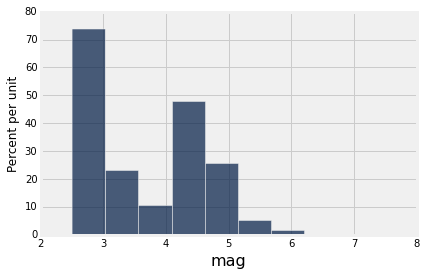

In [41]:
# What does the data tell us about the distribution of Magnitude values?
quakes.select('mag').hist()


### Scaling the Symbols to the Data

Once you have a sense of the data you need to select your formula for scaling the data to the symbols. There are a number of methods for doing this. The most common approach is to identify a minimum and maximum symbol size and then linearly map the range of data values to that range of symbol sizes. The symbol size is typically identified by the radius of a circle so that the area of the circles are proportional to the data values.  This approach is shown below. We set the min and max symbol size to 1000 and 100,000 respectively and then map the data values to those radii. 



In [202]:
# Scale symbols between two sizes
def scaleSymbolSize(theData, dataVal, symMin=1000, symMax=250000):
    valMin = min(theData)
    valMax = max(theData)
    valRange = (valMax - valMin )  
    symRange = (symMax - symMin)  
    symbol_radius = (((dataVal - valMin) * symRange) / valRange) + symMin
    return symbol_radius

However, since earthquake magnitude on the [Richter scale](https://en.wikipedia.org/wiki/Richter_magnitude_scale) is an exponential we can use an exponential function to scale our symbol size.  We show this below by setting our default symbol radius to 1000 and add to it 6 to the power of the earthquake's magnitude. This is less dramatic than the Richter scale but it seems to work ok for global earthquake mapping. When you create maps using this function you can play with the min and max symbol size values and see that there is an important artistic/interpretive component to data visualization. 

In [216]:
# Scale symbols exponentially
def scaleSymbolSizeExponentially(dataVal):
    symbol_radius = 100 * pow(3.5, dataVal) # quakes['mag']
    return symbol_radius

### Linear Scaling
Now let's see how which of those functions best displays the range of data values when we create proportional symbol maps. First we set the color of each symbol to one value so we only focus on symbol size. Then we create a more descriptive popup so we can click on a quake and get more information. This helps us with debugging so that we can make sure larger symbols are associated with larger data values.

In [250]:
##
## Proportional Symbol Map
##

# Set color the color for the point symbols
quakes['color'] = 'purple'

## Create a more descriptive popup string
def getPopupText(mag, place, time):
    the_text = ("Magnitude %.2f, %s at %s" % (mag, place, time))
    return the_text

#apply our getPopupText function to the table ans populate the description field
quakes['description'] = quakes.apply(lambda x, y, z: getPopupText(x,y,z), ['mag', 'place','time'])

In [229]:
# Scale the Symbol Sizes - linear 
# However, Radius choice is highly scale/zoom-level dependent (could be automated but that might bury important lesson)
quakes['radius'] = quakes.apply(lambda x: scaleSymbolSize(quakes['mag'],x), ['mag'])
table2map = quakes.select(['latitude', 'longitude','description','color','radius'])
Circle.map_table(table2map, line_color="None")

### Exponential Scaling
Now let's try the exponential scaling of the symbol sizes.

In [233]:
quakes['radius'] = quakes.apply(scaleSymbolSizeExponentially, ['mag'])
table2map = quakes.select(['latitude', 'longitude','description','color','radius'])
Circle.map_table(table2map, line_color="None")

## Exploring a Subset of the Earthquake Data
Let's see how the proportional map symbols work when we subset the data and only view US earthquakes. We may need to rethink our symbol choices.

In [251]:
# Let's subset the quake data to focus on US quakes
# We can use the bounding coordinates of the US to do this
# Extent: (-124.848974, 24.396308) - (-66.885444, 49.384358)
usquakes = quakes.where((quakes['latitude'] > 24) & (quakes['latitude'] < 49))
usquakes = usquakes.where((usquakes['longitude'] < -66) & (usquakes['longitude'] > -124))

# We sort the data so that ...
usquakes = usquakes.sort("mag", descending = False)
#usquakes


In [294]:
# Take a look at the data
quakes.select(['mag']).stats()

statistic | mag
min       | 2.5
max       | 7.8
median    | 3.4
sum       | 5125.02

/opt/conda/lib/python3.4/site-packages/datascience/tables.py:231: FutureWarning: column_labels is deprecated; use labels
  warnings.warn("column_labels is deprecated; use labels", FutureWarning)


('time',
 'latitude',
 'longitude',
 'depth',
 'mag',
 'magType',
 'nst',
 'gap',
 'dmin',
 'rms',
 'net',
 'id',
 'updated',
 'place',
 'type',
 'horizontalError',
 'depthError',
 'magError',
 'magNst',
 'status',
 'locationSource',
 'magSource',
 'color',
 'description')

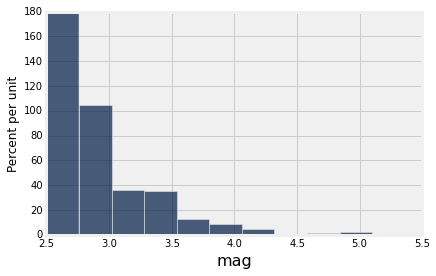

In [295]:
#Take a look at the data
usquakes.select(['mag']).hist()
 
quakes.column_labels

In [253]:
# Scale the Symbol Sizes - linear 
# However, Radius choice is highly scale/zoom-level dependent (could be automated but that might bury important lesson)
usquakes['radius'] = usquakes.apply(lambda x: scaleSymbolSize(usquakes['mag'],x, symMin=500, symMax=50000), ['mag'])
table2map = usquakes.select(['latitude', 'longitude','description','color','radius'])
Circle.map_table(table2map, line_color="None") 

In [254]:
# Scale US quakes exponentially
usquakes['radius'] = usquakes.apply(scaleSymbolSizeExponentially, ['mag'])
table2map = usquakes.select(['latitude', 'longitude','description','color','radius'])
Circle.map_table(table2map, line_color="None")

### Problems with Proportional Symbol Maps

Proportional maps are great at identifying trends and outliers. However, because they are *unclassed* and thus represent the full range of data values, it is really hard to associate specific values with symbol sizes, even with a legend. For this reason **graduated symbol maps**, which group the data into distinct classes, are often preferred.

## Graduated Symbol Maps

Graduated symbol maps classify the data into 3 - 7 classes, typically, based on a classification method and then set the size of the symbol based on the class. Again, classes with larger values get represented with larger symbols. The classification method and number of classes greatly impact the visual display of the mapped data. Five classes is often considered the optimal number that can be easily differentiated by the human eye. The selection of classification requires much more thought and is based on the data being visualized. 

We will compare maps based on the following three commonly used classification methods:
- **Equal interval** divides observations into N classes with equal data value ranges. For example, if your data values range from 0 to 50 and you have 5 classes, then the data will classed into the following bins: 0-10, 10-20, 20-30, 30-40, 40-50.
    - Works great if your data are well distributed across the full range of values. Also very easy to understand the bin mappings, or class breaks, and create comparisons accross time or data sets when using the same class breaks.
    - Not so great if your data area skewed or have outliers and/or only occupy a few of the classes.
    
  
- **Quantiles** classification places an equal number of observations in each class. For example, if you have 10 observations and 5 classes the data will be ordered by value from low to high and the first two values will go into the first class, etc.
    - Good for creating good looking visualizations as it spreads the data values accross the range of symbology options.
    - Not so great if it creates artificial groupings in your data.


- **Jenks** classification tries to creating groupings that minimize within group variance and maximizes between group variance. Thus, it is called *natural breaks* classification and an *optimal* classifier.
    - Very useful for mapping symbology to data values and giving a sense of the trends in the data.
    - Hard for consumers to understand the rationale for the classes. Difficult to compare two maps as the range of symbols will be different as.
    
    
- **Manual** classification is based on the data scientist's knowledge of the data.

For a succinct discussion of data classification see: Indiemapper.com's [The Basics of Data Classification](http://indiemapper.com/app/learnmore.php?l=classification).

Let's get started with creating Graduate Sysmbol maps by firsting importing a function to create class breaks based on the different classification methods.'

In [244]:
## Import some functions to create data class breaks, or intervals, based on different classification methods.
## The classification methods we will try are: equal interval, quantile, and Jenks.
from class_intervals_only import * 

In [86]:
# This cell demonstrates how you can pass the data value on which you will base the symbol size to one of the
# classification functions (equal, quantile, or jenks).
# The classification function returns the class break values into which all earthquakes will be binned
# based on the earthquake magnitude.

# Classify the magnitude values into 5 classes using quantile breaks
my_classes = quantile(usquakes['mag']) 
my_classes


[2.5,
 2.6000000000000001,
 2.7000000000000002,
 2.8879999999999999,
 3.2000000000000002,
 5.0999999999999996]

### Create Graduated Symbol Mapping Functions
Let's creates some functions to set the symbol radius based on class breaks and then map the data. The class breaks are determined by applying a classification function to the data.

In [258]:
# Create a function to set symbol SIZE based on the classes.
# Note these sizes are hardcoded in the function.
# Different size values work better at different zoom levels.
# Here we are looking for sizes that can help us answer questions of the data 
# at a zoom level that shows the entire US.
def setSymbolSizeByClass(breaks, val):
    if val <= breaks[1]:
        return 1000
    elif val <= breaks[2]:
        return 5000
    elif val <= breaks[3]:
        return 10000
    elif val <= breaks[4]:
        return 15000
    else:
        return 30000

In [259]:
def makeGradSymbolMap(classScheme):
    my_classes = classScheme(usquakes['mag'])
    print(my_classes)
    usquakes['radius'] = usquakes.apply(lambda x: setSymbolSizeByClass(my_classes, x), ['mag'])
    table2map = usquakes.select(['latitude', 'longitude','description','color','radius'])
    return Circle.map_table(table2map, line_color="None")

In [260]:
makeGradSymbolMap(equal)

[2.5, 3.02, 3.54, 4.0599999999999996, 4.5800000000000001, 5.0999999999999996]


In [261]:
makeGradSymbolMap(quantile)

[2.5, 2.5899999999999999, 2.7000000000000002, 2.8959999999999999, 3.2000000000000002, 5.0999999999999996]


In [262]:
makeGradSymbolMap(jenks)

[2.5, 2.75, 3.1099999999999999, 3.6000000000000001, 4.3099999999999996, 5.1]


# Graduated Color Maps
Graduated color maps are an alternative to graduated symbol maps. As the name implies, instead of changing the symbol size, you change the symbol color. With these maps the choice of color palatte - *the range of colors mapped to the data values* greatly impacts how the map will be interpretted.  There are two types of color palettes used for quantitiative data: (1) sequential and (2) diverging.  Sequential palettes use one or more colors to create the impression of low to high values based on the lightness, saturation, or hue, eg white to pinke to read. Diverging color schemes are good if you want to identify an average or median values by a neutral color (white, light yellow, grey) and then use brighter colors to idicate lwoer or higher values. Divergent color schemes are particularly helpful for identifying outliers.  For more on color palettes see [colorbrewer.org](http://colorbrewer.rog)

Let's explore graduated color maps with the three classification methods we used above - equal, quantile, and jenks - with a sequential color palette from colorbrewer.org. We start by creating a function to map the data values to the color palette and then we create the map.


In [286]:
# Create a function to set symbol size based on the classes
def setSymbolColorByClass(breaks, val):
    # Get a set of hexadecimal values for a sequential color palatte
    # from colorbrewer.org

    brewerPal = ("#d4b9da","#c994c7","#df65b0","#dd1c77","#980043")
    if val <= breaks[1]:
        return brewerPal[0]
    
    elif val <= breaks[2]:
        return brewerPal[1]
    
    elif val <= breaks[3]:
        return brewerPal[2]
    
    elif val <= breaks[4]:
        return brewerPal[3]
    
    else:
        return brewerPal[4]

In [287]:
def makeGradColorMap(classColorScheme):
    my_classes = classColorScheme(usquakes['mag'])
    print(my_classes)
    usquakes['color'] = usquakes.apply(lambda x: setSymbolColorByClass(my_classes, x), ['mag'])
    table2map = usquakes.select(['latitude', 'longitude','description','color','radius'])
    return Circle.map_table(table2map, fill_opacity=.75, line_color="None")


In [288]:
# Reset the radius value for all qualkes so we can isolate the impact of color.
# We use this large value so we can see the colors when zoomed out to the entire US.
usquakes['radius'] = 25000

In [289]:
makeGradColorMap(equal)

[2.5, 3.02, 3.54, 4.0599999999999996, 4.5800000000000001, 5.0999999999999996]


In [290]:
makeGradColorMap(quantile)

[2.5, 2.5899999999999999, 2.7000000000000002, 2.8959999999999999, 3.2000000000000002, 5.0999999999999996]


In [291]:
makeGradColorMap(jenks)

[2.5, 2.75, 3.1099999999999999, 3.6000000000000001, 4.3099999999999996, 5.1]
